# Part one import libraries and read data

In [1]:
import os
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('always')

In [2]:
df=pd.read_csv("Weather Data.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


### describe data

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [6]:
df.shape

(8784, 8)

In [7]:
df.drop("Weather" , axis=1,inplace=True)

In [8]:
df["Date/Time"]=pd.to_datetime(df["Date/Time"])

In [9]:
print (f"The maximum datetime: {df['Date/Time'].max()}")
print (f"The minmum datetime: {df['Date/Time'].min()}")

The maximum datetime: 2012-12-31 23:00:00
The minmum datetime: 2012-01-01 00:00:00


In [10]:
df.rename({"Date/Time" : "Date"} ,axis=1,inplace=True)
df.index=df["Date"]
df.drop("Date",axis=1,inplace=True)
df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Date,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95


# Part Four Train Test split

In [11]:
# [[[t1,d1,r1,w1,v1,p1],[t2,d2,r2,w2,v2,p2],[t3,d3,r3,w3,v3,p3],[t4,d4,r4,w4,v4,p4],[t5,d5,r5,w5,v5,p5]]],[t6,d6,r6,w6,v6,p6]
# [[[t2,d2,r2,w2,v2,p2],[t3,d3,r3,w3,v3,p3],[t4,d4,r4,w4,v4,p4],[t5,d5,r5,w5,v5,p5],[t6,d6,r6,w6,v6,p6]]],[t7,d7,r7,w7,v7,p7]
# [[[t3,d3,r3,w3,v3,p3],[t4,d4,r4,w4,v4,p4],[t5,d5,r5,w5,v5,p5],[t6,d6,r6,w6,v6,p6],[t7,d7,r7,w7,v7,p7]]],[t8,d8,r8,w8,v8,p8]

def df_to_x_y(df,window_size=5):
    df_as_np=df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        row=df_as_np[i:i+window_size]
        x.append(row)
        label=df_as_np[i+window_size][0]
        y.append(label)
    return np.array(x) ,np.array(y)

In [12]:
x,y=df_to_x_y(df)
print (x.shape,y.shape)

(8779, 5, 6) (8779,)


In [13]:
x_train=x[:6500]
y_train=y[:6500]
x_val=x[6500:7500]
y_val=y[6500:7500]
x_test=x[7500:]
y_test=y[7500:]


print (f'x_train.shape:{x_train.shape} , y_train.shape: {y_train.shape}')
print (f'x_val.shape:{x_val.shape} , y_val.shape: {y_val.shape}')
print (f'x_test.shape:{x_test.shape} , y_test.shape: {y_test.shape}')

x_train.shape:(6500, 5, 6) , y_train.shape: (6500,)
x_val.shape:(1000, 5, 6) , y_val.shape: (1000,)
x_test.shape:(1279, 5, 6) , y_test.shape: (1279,)


### standrization input data

In [14]:
temp_training_mean=np.mean(x_train[:,:])
temp_training_std=np.std(x_train[:,:])

def standrization (x):
    x[:,:]=(x[:,:] - temp_training_mean)/temp_training_std
    return x

In [15]:
standrization(x_train)
standrization(x_val)
standrization(x_test)

array([[[-0.91468179, -1.12012759,  0.56726729, -0.36408703,
         -0.36134775,  1.75310048],
        [-0.89276757, -1.11190976,  0.51248174, -0.30930148,
         -0.36134775,  1.75173085],
        [-0.88181046, -1.11464904,  0.4576962 , -0.30930148,
         -0.36134775,  1.75090906],
        [-0.87907118, -1.11190976,  0.4576962 , -0.47365812,
         -0.36134775,  1.75008728],
        [-0.9009854 , -1.12560615,  0.48508897, -0.5010509 ,
         -0.36134775,  1.74981335]],

       [[-0.89276757, -1.11190976,  0.51248174, -0.30930148,
         -0.36134775,  1.75173085],
        [-0.88181046, -1.11464904,  0.4576962 , -0.30930148,
         -0.36134775,  1.75090906],
        [-0.87907118, -1.11190976,  0.4576962 , -0.47365812,
         -0.36134775,  1.75008728],
        [-0.9009854 , -1.12560615,  0.48508897, -0.5010509 ,
         -0.36134775,  1.74981335],
        [-0.93385673, -1.13656326,  0.56726729, -0.66540754,
         -0.36134775,  1.75063514]],

       [[-0.88181046, -1.1

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


model=Sequential()
model.add(InputLayer((5,6)))
model.add(LSTM(units=128,return_sequences=True))
model.add(LSTM(units=128,return_sequences=True))
# model.add(LSTM(units=128,return_sequences=True))
model.add(LSTM(units=128,return_sequences=False))

model.add(Dense(64,'relu'))
model.add(Dense(1,'linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 128)              │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 340,609 (1.30 MB)

 Trainable params: 340,609 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cp = ModelCheckpoint('model/model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [18]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,callbacks=cp)

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 225.1183 - root_mean_squared_error: 14.9762 - val_loss: 27.0012 - val_root_mean_squared_error: 5.1554
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 78.5645 - root_mean_squared_error: 8.7310 - val_loss: 9.0302 - val_root_mean_squared_error: 2.9699
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 17.9850 - root_mean_squared_error: 4.2374 - val_loss: 8.3843 - val_root_mean_squared_error: 2.8692
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 10.4115 - root_mean_squared_error: 3.2230 - val_loss: 6.5775 - val_root_mean_squared_error: 2.5673
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.5969 - root_mean_squared_error: 2.7552 - val_loss: 4.5363 - val_root_mean_squared_error: 2.1023
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.8165 - root_mean_squared_error: 2.6104 - val_loss: 5.3096 - val_root_mean_squared_error: 2.3120
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━

### make predications

In [19]:
from tensorflow.keras.models import load_model
model=load_model('model/model.keras')

In [20]:
train_pred=model.predict(x_train).flatten()
train_result=pd.DataFrame(data={"actual":y_train,"pred":train_pred})
train_result

204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


,actual,pred
0,-1.4,-1.106931
1,-1.5,-0.731402
2,-1.4,-0.555084
3,-1.4,-0.472123
4,-1.3,-0.415372
...,...,...
6495,11.5,12.596132
6496,9.4,10.481417
6497,9.3,9.075370
6498,9.2,8.951754


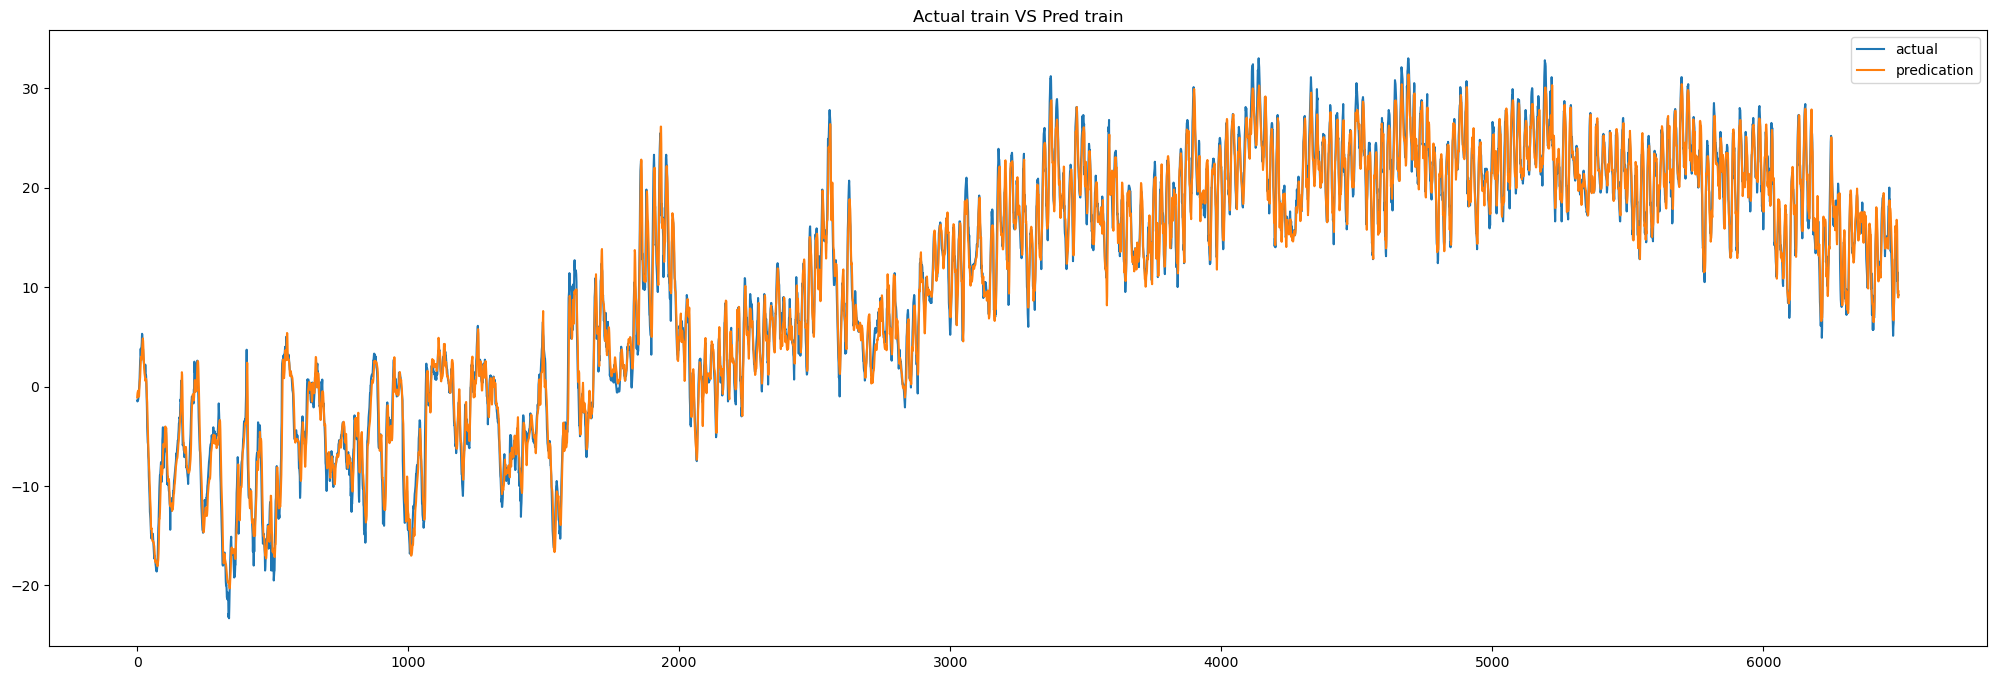

In [21]:
fig=plt.figure(figsize=(25,8))
plt.plot(y_train)
plt.plot(train_pred)
plt.legend(['actual','predication'])
plt.title("Actual train VS Pred train")
plt.show()

In [22]:
val_pred=model.predict(x_val).flatten()
val_result=pd.DataFrame(data={"actual":y_val,"pred":val_pred})
val_result

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,actual,pred
0,8.0,9.895865
1,8.9,9.462070
2,7.2,8.765207
3,6.0,8.032169
4,5.1,6.835105
...,...,...
995,3.9,1.679512
996,4.7,2.484179
997,5.1,3.186796
998,5.2,3.825368


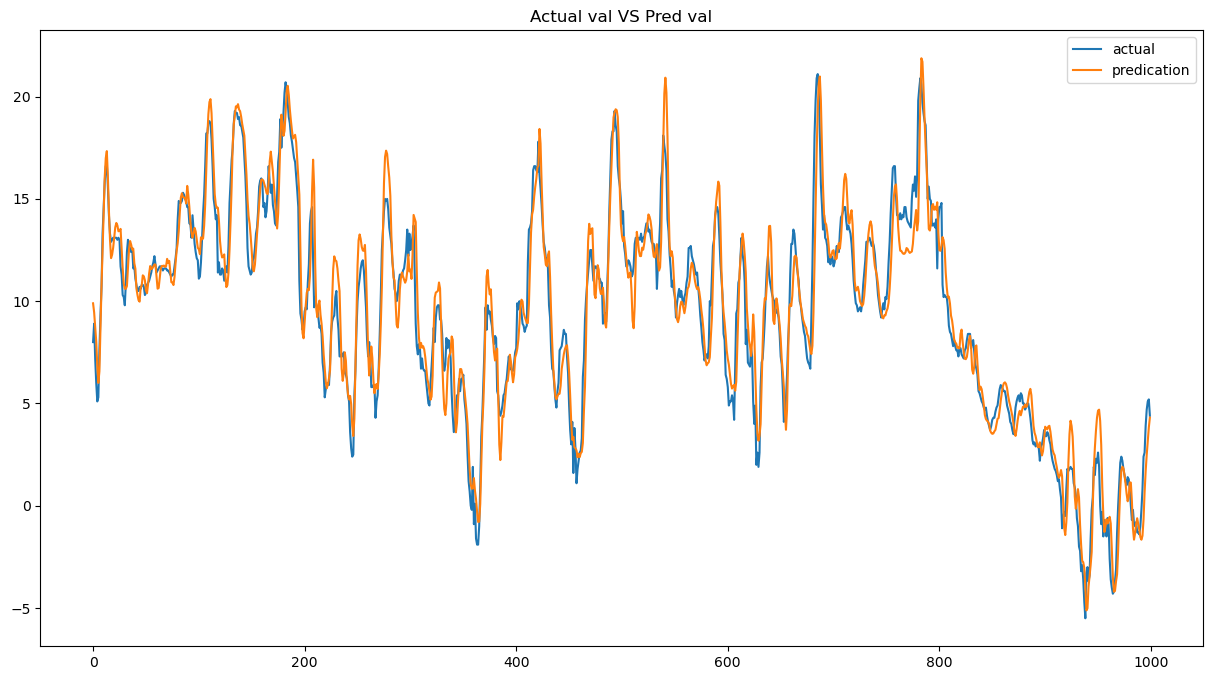

In [23]:
fig=plt.figure(figsize=(15,8))
plt.plot(y_val)
plt.plot(val_pred)
plt.legend(['actual','predication'])
plt.title("Actual val VS Pred val")
plt.show()

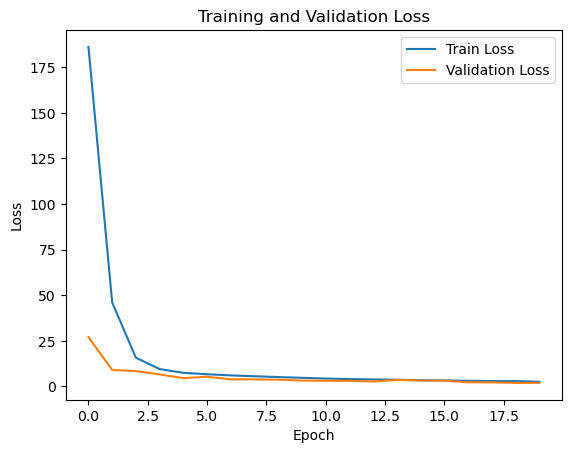

In [24]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import r2_score

test_pred=model.predict(x_test).flatten()
test_result=pd.DataFrame(data={"actual":y_test,"pred":test_pred})
r2=np.round(r2_score(y_test,test_pred),2)
print (r2)
print ("-------------------------------------")
test_result

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
0.91
-------------------------------------


,actual,pred
0,3.2,4.308090
1,2.4,3.796454
2,1.8,2.799345
3,1.7,1.936337
4,0.5,1.817128
...,...,...
1274,0.1,-1.909292
1275,0.2,-1.307616
1276,-0.5,-0.774854
1277,-0.2,-0.805231


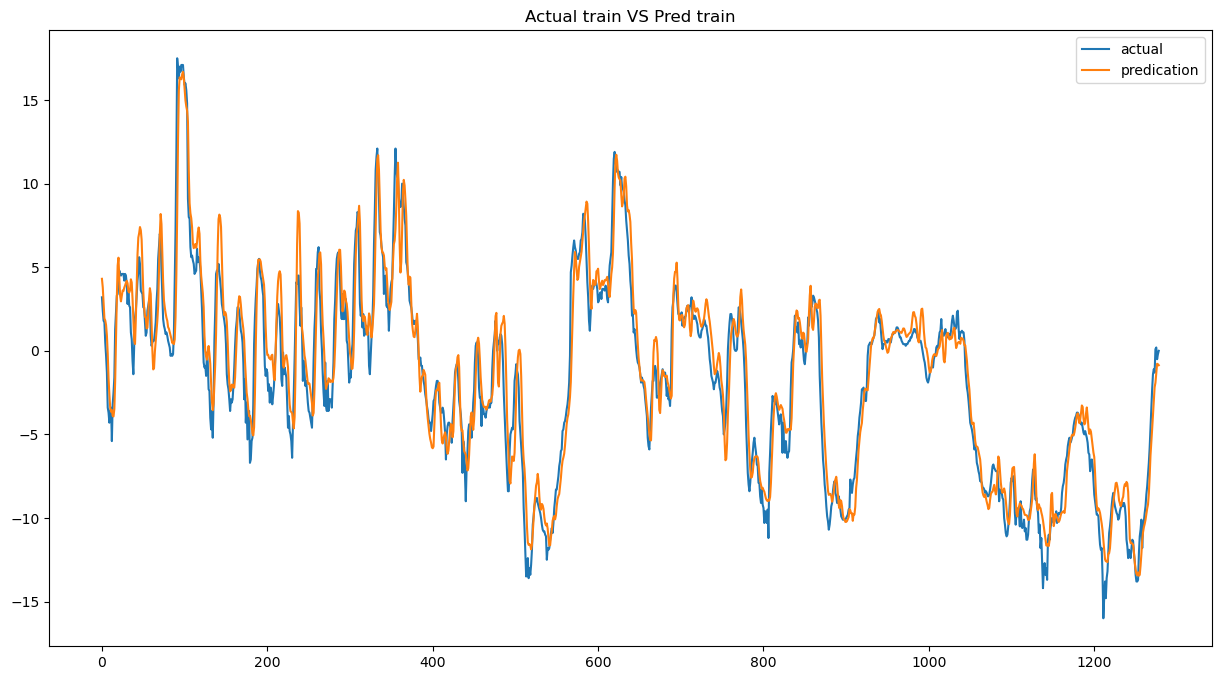

In [26]:
fig=plt.figure(figsize=(15,8))
plt.plot(y_test)
plt.plot(test_pred)
plt.legend(['actual','predication'])
plt.title("Actual train VS Pred train")
plt.show()